# 2.1 Process Event Consumer (5%)

<p>Write a python program that consumes the process events using kafka consumer, visualise
the record counts in real time. Save the file as
Assignment-2B-Task2_process_consumer.ipynb .<p>
<p>Your program should get the count of records arriving in the last 2-minutes ( use the
processing time ) for each machine, and use line charts to visualise.<p>
<p>- Hint - x-axis can be used to represent the timeline, while y-axis can be used to
represent the count; each machine’s line data can be represented in different color
legends<p>

<IPython.core.display.Javascript object>


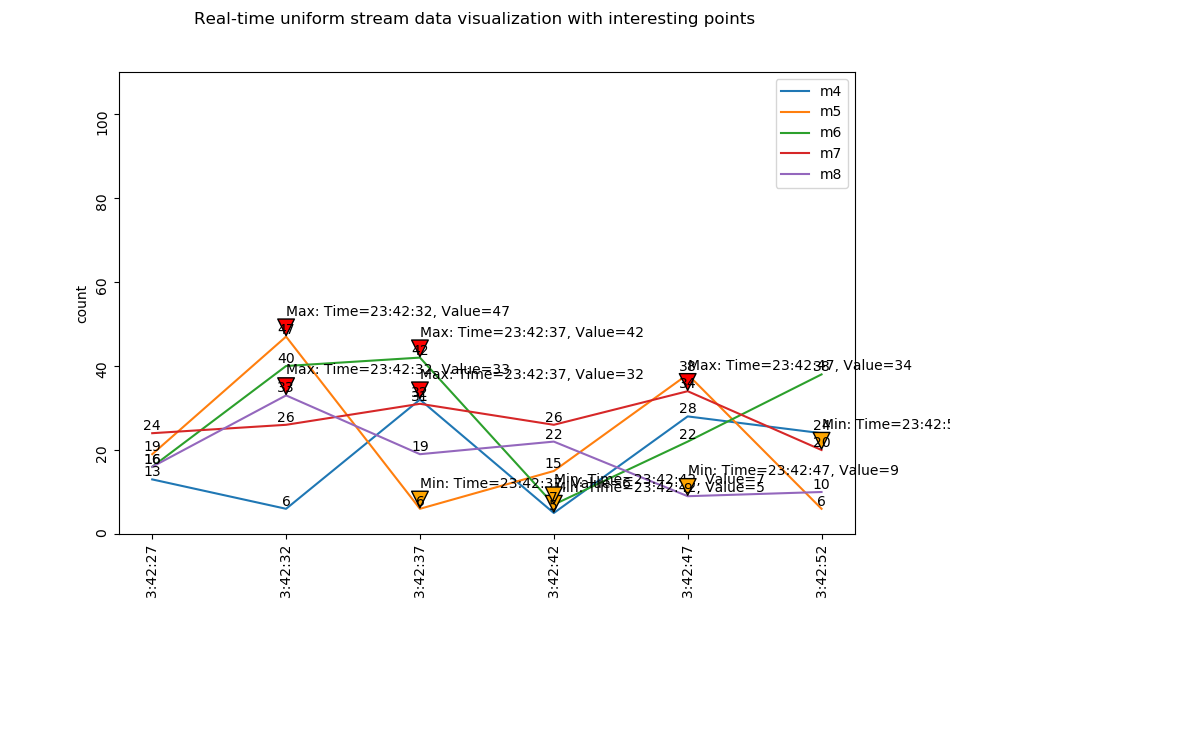

23:42:22
23:42:27
23:42:32
23:42:37
23:42:42
23:42:47
23:42:52


KeyboardInterrupt: 

In [4]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import ast
import time
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'ass_2B_process'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=100000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y4,y5,y6,y7,y8 = [], [],[],[],[],[]
        count4 = 0
        count5 = 0
        count6 = 0
        count7 = 0
        count8 = 0
        
        # print('Waiting for messages')
        for message in consumer:
            data = str(message.value.decode('utf-8'))
            data = ast.literal_eval(data)
            t = time.strftime("%H:%M:%S",time.localtime(int(time.time())))
            print(t)
            x.append(t)
# #             print(t)
            for c in data:
                if c["machine"] == 4:
                    count4 += 1
                elif c["machine"] == 5:
                    count5 += 1
                elif c["machine"] == 6:
                    count6 += 1
                elif c["machine"] == 7:
                    count7 += 1
                elif c["machine"] == 8:
                    count8 += 1
            
            y4.append(count4)
            y5.append(count5)
            y6.append(count6)
            y7.append(count7)
            y8.append(count8)
            count4 = 0
            count5 = 0
            count6 = 0
            count7 = 0
            count8 = 0
            # we start plotting only when we have 10 data points
            if len(x) > 5:
#             if len(y4) > 120 /5:
                ax.clear()
                ax.plot(x, y4, label = "m4")
                ax.plot(x,y5, label = "m5")
                ax.plot(x,y6, label = "m6")
                ax.plot(x,y7, label = "m7")
                ax.plot(x,y8, label = "m8")
                ax.set_xlabel('Time')
                ax.set_ylabel('count')
                ax.set_ylim(0,110) 
                ax.legend()
#                 ax.set_yticks([0,20,40,60,80,100])
                ax.tick_params(labelrotation = 90)
                annotate_max(x,y4)
                annotate_max(x,y5)
                annotate_max(x,y6)
                annotate_max(x,y7)
                annotate_max(x,y8)
                annotate_min(x,y4)
                annotate_min(x,y5)
                annotate_min(x,y6)
                annotate_min(x,y7)
                annotate_min(x,y8)
                for values in [y4,y5,y6,y7,y8]:
                    for idx, label in enumerate(values):
                        plt.text(idx, label, label, ha='center', va='bottom')

                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y4.pop(0)
                y5.pop(0)
                y6.pop(0)
                y7.pop(0)
                y8.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    